# <font color=blue>Assignments for "Data Exploration - Univariate Analysis"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
df_states=pd.read_csv('states_all.csv')
 

**(1)** Interpret the data by making univariate analysis and indicate the points you consider important.

In [2]:
df_states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [3]:
df_states.STATE.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING', 'DODEA', 'NATIONAL'],
      dtype=object)

In [4]:
df_states["winsorize_total_revenue"] = winsorize(df_states["TOTAL_REVENUE"], (0, 0.10))
df_states["winsorize_total_expenditure"] = winsorize(df_states["TOTAL_EXPENDITURE"], (0, 0.10))
df_states["winsorize_state_revenue"] = winsorize(df_states["STATE_REVENUE"], (0, 0.10))

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


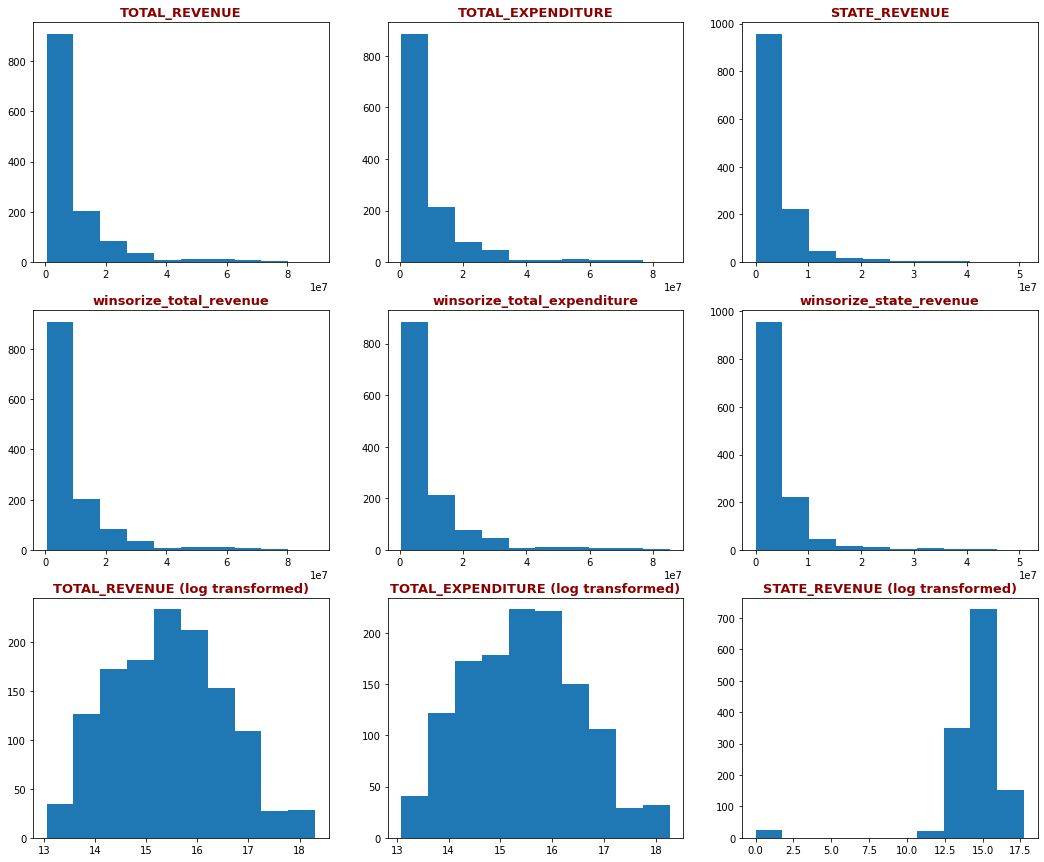

In [5]:
plt.figure(figsize=(18,15))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

variables = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE' , 'STATE_REVENUE']
winsorize_variables= ['winsorize_total_revenue', 'winsorize_total_expenditure', 'winsorize_state_revenue']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(df_states[variables[i]])
    plt.title(variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(df_states[winsorize_variables[i]])
    plt.title(winsorize_variables[i], fontdict=title_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(df_states[variables[i]]+1))
    plt.title(variables[i] + ' (log transformed)', fontdict=title_font)

**(2)** Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

Text(0.5, 0, 'Year')

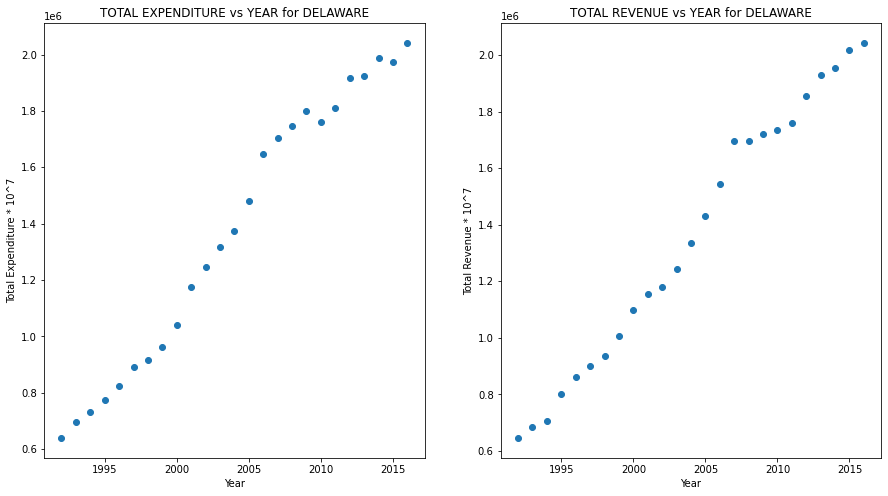

In [6]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(df_states[(df_states["STATE"]=="DELAWARE")].YEAR,df_states[(df_states["STATE"]=="DELAWARE")].TOTAL_EXPENDITURE)
plt.title("TOTAL EXPENDITURE vs YEAR for DELAWARE")
plt.ylabel("Total Expenditure * 10^7")
plt.xlabel("Year")
plt.subplot(1,2,2)
plt.scatter(df_states[(df_states["STATE"]=="DELAWARE")].YEAR,df_states[(df_states["STATE"]=="DELAWARE")].TOTAL_REVENUE)
plt.title("TOTAL REVENUE vs YEAR for DELAWARE")
plt.ylabel("Total Revenue * 10^7")
plt.xlabel("Year")


Total Expenditure and Revenue increase year by year same increasing rate. There is a bottom value in 2011 for total expenditure. It must be budget deficit. In 2011, total revenue value is not lower as total expenditure. There is a summit in nearly in 2009 for both features. 

**(3)** In which course are students more successful in your chosen state? Mathematics or reading?

In [7]:
mathsum=df_states[(df_states["STATE"]=="DELAWARE")].AVG_MATH_8_SCORE+df_states[(df_states["STATE"]=="DELAWARE")].AVG_MATH_4_SCORE
print("8. and 4. class students mean score of math course :", np.mean(mathsum))
readingsum=df_states[(df_states["STATE"]=="DELAWARE")].AVG_READING_8_SCORE+df_states[(df_states["STATE"]=="DELAWARE")].AVG_READING_4_SCORE
print("8. and 4. class students mean score of reading course :", np.mean(readingsum))


8. and 4. class students mean score of math course : 516.0
8. and 4. class students mean score of reading course : 486.0


Mean of math course degree value is higher than reading course. So students in math couse successful in Delaware. 

**(4) What is the distribution of mathematics and reading grades?**

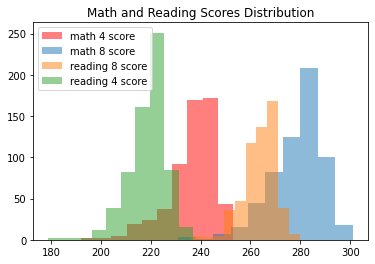

In [8]:
plt.hist(df_states.AVG_MATH_4_SCORE, alpha=0.5, label='math 4 score', color="red") 
plt.hist(df_states.AVG_MATH_8_SCORE, alpha=0.5, label='math 8 score') 
plt.hist(df_states.AVG_READING_8_SCORE, alpha=0.5, label='reading 8 score') 
plt.hist(df_states.AVG_READING_4_SCORE, alpha=0.5, label='reading 4 score') 
plt.title("Math and Reading Scores Distribution")
plt.legend(loc='upper left') 

**(5) You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.**

In [9]:
df_states1=df_states.copy()
df_states2=df_states.copy()
df_states3=df_states.copy()
from scipy import stats

In [10]:
grades=df_states.columns[21:25]

In [11]:
for i in grades:
  df_states1[i] = df_states1[i].fillna(np.mean(df_states1[i].dropna()))
  df_states2[i] = df_states2[i].fillna(np.median(df_states2[i].dropna()))
  df_states3[i] = df_states3[i].fillna(df_states[i].sort_values().interpolate(method ='linear', limit_direction ='forward'))

In [12]:
df_states1.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          491
TOTAL_REVENUE                   440
FEDERAL_REVENUE                 440
STATE_REVENUE                   440
LOCAL_REVENUE                   440
TOTAL_EXPENDITURE               440
INSTRUCTION_EXPENDITURE         440
SUPPORT_SERVICES_EXPENDITURE    440
OTHER_EXPENDITURE               491
CAPITAL_OUTLAY_EXPENDITURE      440
GRADES_PK_G                     173
GRADES_KG_G                      83
GRADES_4_G                       83
GRADES_8_G                       83
GRADES_12_G                      83
GRADES_1_8_G                    695
GRADES_9_12_G                   644
GRADES_ALL_G                     83
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               0
winsorize_total_revenue         440
winsorize_total_expenditure     440
winsorize_state_revenue     

So there is no null value for grades.

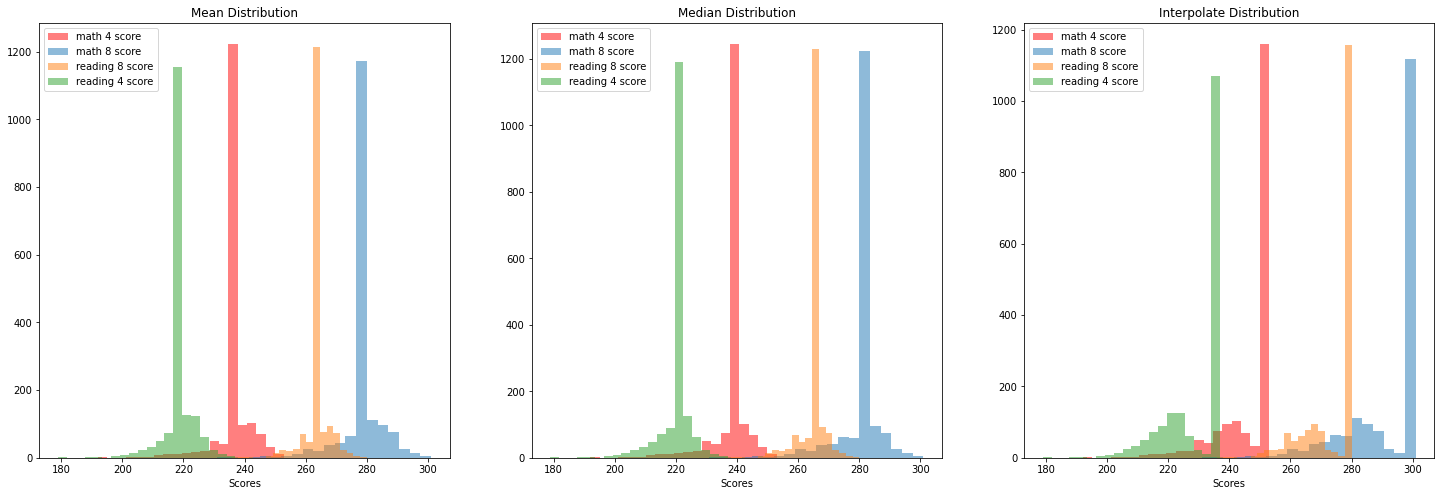

In [13]:
plt.figure(figsize=(25,8))
plt.subplot(1,3,1)
plt.hist(df_states1.AVG_MATH_4_SCORE, alpha=0.5, label='math 4 score', color="red",bins=20) 
plt.hist(df_states1.AVG_MATH_8_SCORE, alpha=0.5, label='math 8 score',bins=20) 
plt.hist(df_states1.AVG_READING_8_SCORE, alpha=0.5, label='reading 8 score',bins=20) 
plt.hist(df_states1.AVG_READING_4_SCORE, alpha=0.5, label='reading 4 score',bins=20) 
plt.xlabel("Scores")
plt.title("Mean Distribution")
plt.legend(loc='upper left') 
plt.subplot(1,3,2)
plt.hist(df_states2.AVG_MATH_4_SCORE, alpha=0.5, label='math 4 score', color="red",bins=20) 
plt.hist(df_states2.AVG_MATH_8_SCORE, alpha=0.5, label='math 8 score',bins=20) 
plt.hist(df_states2.AVG_READING_8_SCORE, alpha=0.5, label='reading 8 score',bins=20) 
plt.hist(df_states2.AVG_READING_4_SCORE, alpha=0.5, label='reading 4 score',bins=20) 
plt.xlabel("Scores")
plt.title("Median Distribution")
plt.legend(loc='upper left') 
plt.subplot(1,3,3)
plt.hist(df_states3.AVG_MATH_4_SCORE, alpha=0.5, label='math 4 score', color="red",bins=20) 
plt.hist(df_states3.AVG_MATH_8_SCORE, alpha=0.5, label='math 8 score',bins=20) 
plt.hist(df_states3.AVG_READING_8_SCORE, alpha=0.5, label='reading 8 score',bins=20) 
plt.hist(df_states3.AVG_READING_4_SCORE, alpha=0.5, label='reading 4 score',bins=20) 
plt.xlabel("Scores")
plt.title("Interpolate Distribution")
plt.legend(loc='upper left') 

Scores of mean and median distirubiton like each other. Interpolate is different from them. Interpolation of distributions agglomerates on high scores for all scores.